##### Quantum Computing 2025/2026
### Lecture 5 - Quantum Phase Estimation


Implement and optimize the QPE algorithm to estimate the phase of the standard quantum sensing unitary 

$$U = \begin{pmatrix} 1 & 0 \\ 0 & e^{2 \pi i / 5} \end{pmatrix}$$

analytical value of the phase is $\phi = \frac{1}{5} = 0.2$.

In [2]:
import pennylane as qml 
from pennylane import numpy as np
from functools import partial

In [ ]:
def M(wires):
    return qml.PhaseShift(2 * np.pi / 5, wires=wires)
    

In [153]:
qubits_estimation = 6
estimation_wires = list(range(qubits_estimation))
eigen_wires = qubits_estimation

dev = qml.device("default.qubit", wires=estimation_wires + [eigen_wires])

@partial(qml.transforms.decompose, max_expansion=1)

@qml.qnode(dev)
def circuit_qpe(estimation_wires, eigen_wires):
    # initialize to state |1>
    qml.PauliX(wires=eigen_wires)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(U(wires=eigen_wires), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

(<Figure size 3200x800 with 1 Axes>, <Axes: >)

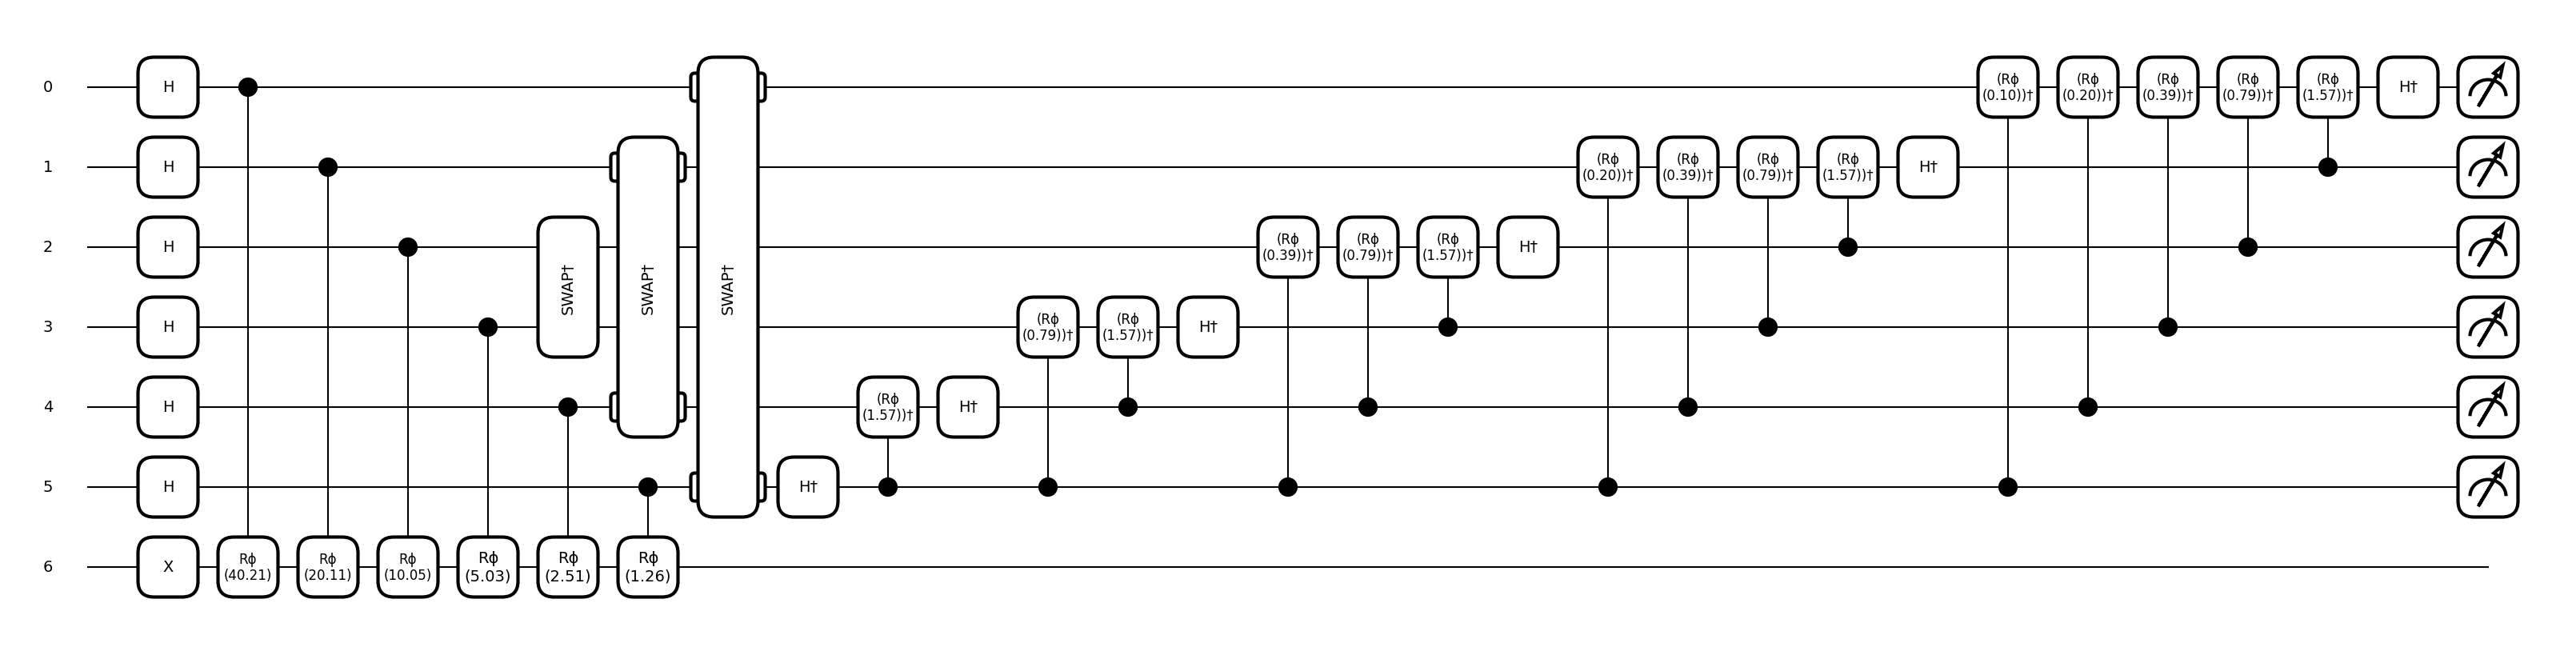

In [154]:
qml.draw_mpl(circuit_qpe, decimals=2)(estimation_wires=estimation_wires, eigen_wires=eigen_wires)

In [155]:
circuit_qpe(estimation_wires=estimation_wires, eigen_wires=eigen_wires)

array([2.44140625e-04, 2.81513049e-04, 3.29886645e-04, 3.93956749e-04,
       4.81232588e-04, 6.04331709e-04, 7.85795655e-04, 1.06917268e-03,
       1.54777175e-03, 2.45252399e-03, 4.49322374e-03, 1.08323601e-02,
       5.47243873e-02, 8.75168317e-01, 2.43375857e-02, 7.26074551e-03,
       3.44677187e-03, 2.01280171e-03, 1.32307247e-03, 9.39300550e-04,
       7.04095255e-04, 5.49658119e-04, 4.42883547e-04, 3.66046975e-04,
       3.08963530e-04, 2.65443261e-04, 2.31548708e-04, 2.04678793e-04,
       1.83059723e-04, 1.65448655e-04, 1.50954253e-04, 1.38924278e-04,
       1.28873058e-04, 1.20433456e-04, 1.13324342e-04, 1.07328105e-04,
       1.02274832e-04, 9.80310139e-05, 9.44913589e-05, 9.15728177e-05,
       8.92101750e-05, 8.73527953e-05, 8.59622272e-05, 8.50104638e-05,
       8.44787213e-05, 8.43566417e-05, 8.46418608e-05, 8.53399102e-05,
       8.64644471e-05, 8.80378265e-05, 9.00920601e-05, 9.26702313e-05,
       9.58284772e-05, 9.96386994e-05, 1.04192238e-04, 1.09604849e-04,
      

[2.44140625e-04 2.81513049e-04 3.29886645e-04 3.93956749e-04
 4.81232588e-04 6.04331709e-04 7.85795655e-04 1.06917268e-03
 1.54777175e-03 2.45252399e-03 4.49322374e-03 1.08323601e-02
 5.47243873e-02 8.75168317e-01 2.43375857e-02 7.26074551e-03
 3.44677187e-03 2.01280171e-03 1.32307247e-03 9.39300550e-04
 7.04095255e-04 5.49658119e-04 4.42883547e-04 3.66046975e-04
 3.08963530e-04 2.65443261e-04 2.31548708e-04 2.04678793e-04
 1.83059723e-04 1.65448655e-04 1.50954253e-04 1.38924278e-04
 1.28873058e-04 1.20433456e-04 1.13324342e-04 1.07328105e-04
 1.02274832e-04 9.80310139e-05 9.44913589e-05 9.15728177e-05
 8.92101750e-05 8.73527953e-05 8.59622272e-05 8.50104638e-05
 8.44787213e-05 8.43566417e-05 8.46418608e-05 8.53399102e-05
 8.64644471e-05 8.80378265e-05 9.00920601e-05 9.26702313e-05
 9.58284772e-05 9.96386994e-05 1.04192238e-04 1.09604849e-04
 1.16023470e-04 1.23635522e-04 1.32681812e-04 1.43474704e-04
 1.56424127e-04 1.72075500e-04 1.91166201e-04 2.14711707e-04]


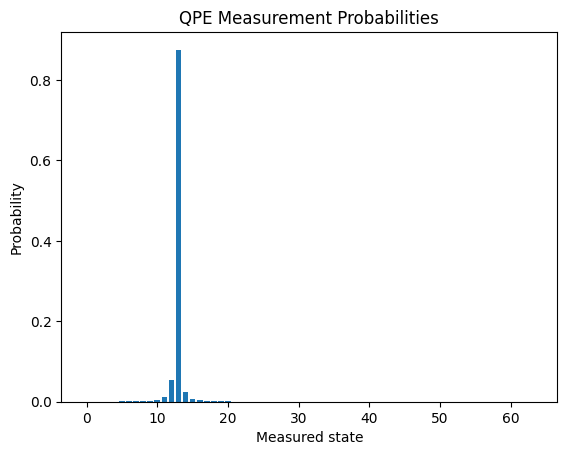

In [156]:
#display probabilities 
probs = circuit_qpe(estimation_wires=estimation_wires, eigen_wires=eigen_wires)
print(probs)
import matplotlib.pyplot as plt
plt.bar(range(len(probs)), probs)
plt.xlabel('Measured state')
plt.ylabel('Probability')
plt.title('QPE Measurement Probabilities')
plt.show()


In [157]:
#get the maximum probability and its index in binary and translate the binary fraction to the angle approximation
max_prob_index = np.argmax(probs)
max_prob = probs[max_prob_index]
print(f"Maximum Probability: {max_prob} at index {max_prob_index} (binary: {format(max_prob_index, '06b')})")

# Convert index to binary fraction
binary_fraction = format(max_prob_index, '06b')
angle_approximation = sum(int(bit) * 2**(-i) for i, bit in enumerate(binary_fraction, start=1))
print(f"Angle Approximation: {angle_approximation}")

Maximum Probability: 0.8751683167958466 at index 13 (binary: 001101)
Angle Approximation: 0.203125


In [17]:
qubits_estimation = 2
estimation_wires = list(range(qubits_estimation))
eigen_wires = qubits_estimation

dev = qml.device("default.qubit", wires=estimation_wires + [eigen_wires])


#dev = qml.device("default.qubit", wires=7)

@partial(qml.transforms.decompose, max_expansion=1)
@qml.qnode(dev)
def circuit_qpe(estimation_wires, eigen_wires):
    # initialize to state |1>
    qml.PauliX(wires=eigen_wires)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    #qml.ControlledSequence(U(wires=eigen_wires), control=estimation_wires)
    for i,j in enumerate(reversed(estimation_wires)):
        angle = (2 * np.pi / 5) * 2**(i)
        qml.ctrl(qml.PhaseShift, control=j)(angle, wires=eigen_wires)
        
    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

(<Figure size 1000x400 with 1 Axes>, <Axes: >)

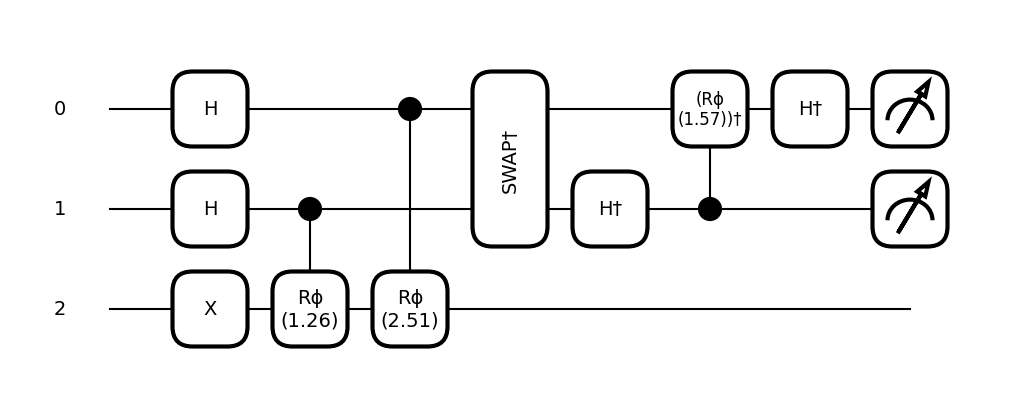

In [18]:
qml.draw_mpl(circuit_qpe, decimals=2)(estimation_wires=estimation_wires, eigen_wires=eigen_wires)

In [19]:
probs =circuit_qpe(estimation_wires=estimation_wires, eigen_wires=eigen_wires)

In [21]:
#get the maximum probability and its index in binary and translate the binary fraction to the angle approximation
max_prob_index = np.argmax(probs)
max_prob = probs[max_prob_index]
print(f"Maximum Probability: {max_prob} at index {max_prob_index} (binary: {format(max_prob_index, '02b')})")

# Convert index to binary fraction
binary_fraction = format(max_prob_index, '02b')
angle_approximation = sum(int(bit) * 2**(-i) for i, bit in enumerate(binary_fraction, start=1))
print(f"Angle Approximation: {angle_approximation}")

Maximum Probability: 0.8823735987409776 at index 1 (binary: 01)
Angle Approximation: 0.25


(<Figure size 400x200 with 1 Axes>, <Axes: >)

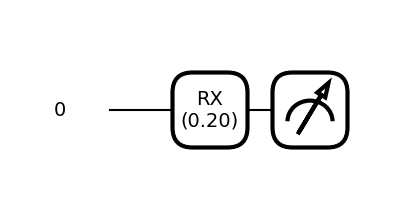

In [8]:
dev = qml.device("default.qubit", wires=7)

def qc(a):
    qml.RX(a,wires=0)
    return qml.probs()



qcc = qml.qnode(dev)(qc)
#qcc = qml.transforms.decompose(qcc, max_expansion=1)

qml.draw_mpl(qcc,decimals=2)(0.2)